In [1]:
from kan import KAN
import torch

In [20]:
model = KAN(width=[2, 3, 2, 1])
x = torch.normal(0, 1, size=(100, 2))
model(x);

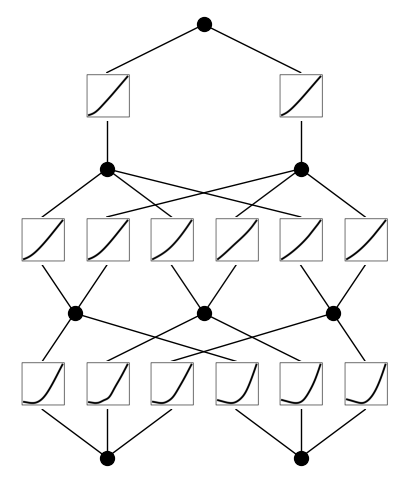

In [21]:
beta = 100 # for visbility like alpha in matplotlib
model.plot(beta=beta)

# Indexing of edges
- Each activation is indexed by (l, i, j).
- l is the later index
- i is the input neuron index
- j is the output neuron index
- the bottom left corner is (0, 0, 0)

r2 is 0.9982931613922119


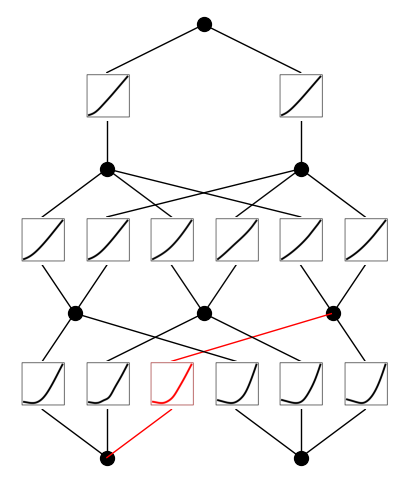

In [24]:
a, b, c = 0, 0, 2
model.fix_symbolic(a, b, c, 'sin')
model.plot(beta=beta)
model.unfix_symbolic(a, b, c)

# Indexing of nodes (neurons)
- Each node(neuron) is indexed by (l, i) where l is the layer index along the depth, i is the neuron index along the width.
- Use `remove_node` to indicate which node to remove.

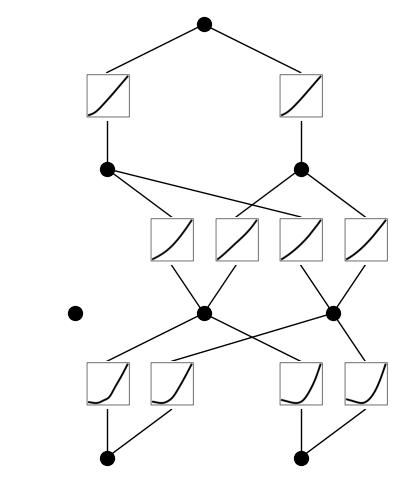

In [26]:
model.remove_node(1, 0)
model.plot(beta=beta)

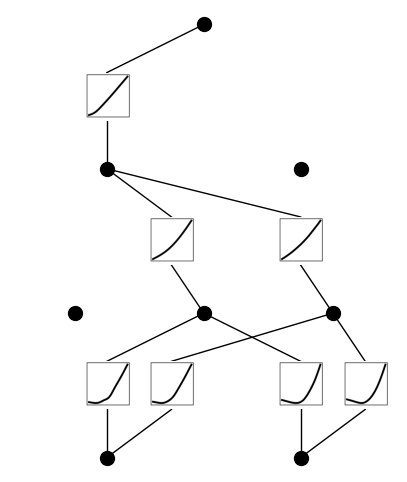

In [27]:
model.remove_node(2, 1)
model.plot(beta=beta)

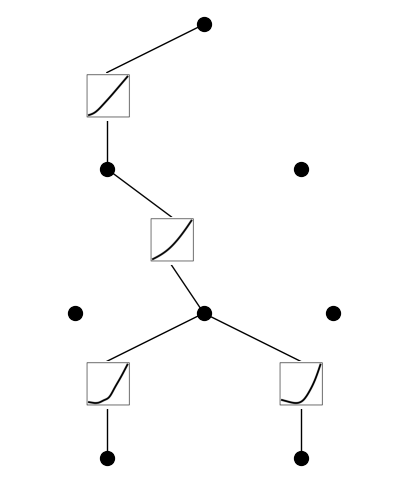

In [29]:
model.remove_node(1, 2)
model.plot(beta=beta)

# Indexing layers
- KAN spline layers are referred to as act_fun
- KAN symbolic layers are referred to as symbolic_fun

In [30]:
model = KAN(width=[2, 3, 2, 1])

i = 0
model.act_fun[i] # => KAN layer (Spline)
model.symbolic_fun[i] # => KAN layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

2 3
2 3
3 2
3 2
2 1
2 1


In [35]:
# Check model parameters
print(f"Grid: {model.act_fun[i].grid}")
print(f"Coef: {model.act_fun[i].coef}")
print(f"Funs_name: {model.symbolic_fun[i].funs_name}")
print(f"Mask: {model.symbolic_fun[i].mask}")

Grid: Parameter containing:
tensor([[-1.0000, -0.3333,  0.3333,  1.0000],
        [-1.0000, -0.3333,  0.3333,  1.0000]])
Coef: Parameter containing:
tensor([[ 0.0019,  0.0159,  0.0235, -0.0337,  0.0116,  0.0059],
        [-0.0014, -0.0040,  0.0005, -0.0146,  0.0122,  0.0043]],
       requires_grad=True)
Funs_name: [['', '']]
Mask: Parameter containing:
tensor([[0., 0.]])
